In [47]:
#get all the stuff we need
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

from Utils import *

import cmocean
import gsw

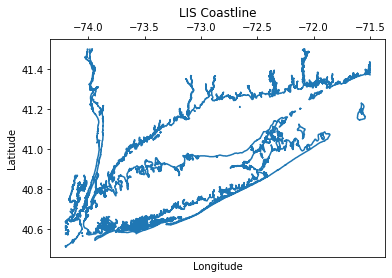

In [48]:
#let's make a coastline
lat_c = []
lon_c = []

file = open('coastline.txt','r')

for line in file:
    fields = line.split(',') #doc has columns split by commas so we use this
    
    lat_c.append(fields[0])
    lon_c.append(fields[1]) #then we put the values from the .txt file into the arrays we made
    
lat_c = [float(i) for i in lat_c]
lon_c = [float(i) for i in lon_c] #gotta float the values so we can graph them

#add some labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('LIS Coastline')

plt.plot(lon_c,lat_c)
plt.show()

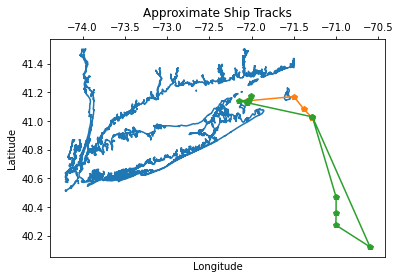

In [49]:
#cool, lets add some approximate tracks from Cruise 1 & 2 - THESE ARE NOT ACCURATE
plt.plot(lon_c,lat_c)

#cruise 1
plt.plot([-71.28,-71.38,-71.5,-72.05],[41.02,41.08,41.17,41.14],'p-')

#cruise 2
plt.plot([-71.2804,-70.5994,-71.0036,-71.0008,-71.0009,-71.2816,-72.1551,-72.0318,-72.0539,-72.0119],
         [41.0277,40.1205,40.2729,40.3601,40.4682,41.0281,41.14,41.1436,41.1269,41.1768],'p-')
#there's definitley an easier way to do the plots above; gotta be a way to import the values from the CNV's

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Approximate Ship Tracks')
plt.show()

Text(0.5, 0.98, 'Cruise 1 CTD Data - Order Sampled')

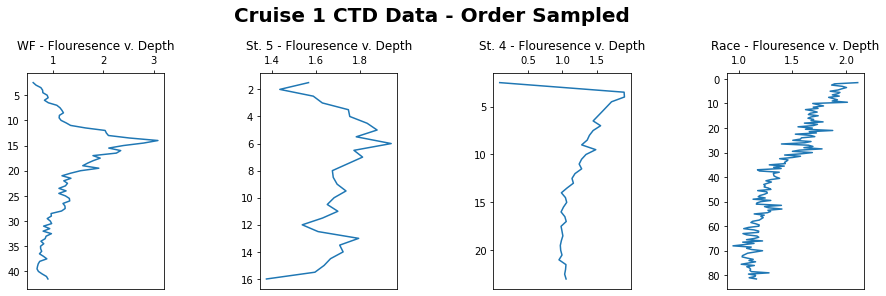

In [50]:
#alright, time for the hard stuff
#let's see if we can make CTD profiles of Chl (flouresence) v. Depth for each station

#make our empty list for cruise 1; depth then chl values
d4 = []
d5 = []
dWF = []
drace = []

c4 = []
c5 = []
cWF = []
crace = []

stn_4 = open('ST4_CTD_1.txt','r')
stn_5 = open('ST5_CTD_1.txt','r')
stn_wf = open('STWF_CTD_1.txt','r')
stn_race = open('RACE_CTD_1.txt', 'r')

#grab the values and then store in the lists we created
for line in stn_4:
	fields = line.split(',')
	d4.append(fields[0])
	c4.append(fields[9])
    
for line in stn_5:
	fields = line.split(',')
	d5.append(fields[0])
	c5.append(fields[9])
    
for line in stn_wf:
	fields = line.split(',')
	dWF.append(fields[0])
	cWF.append(fields[9])
    
for line in stn_race:
	fields = line.split(',')
	drace.append(fields[0])
	crace.append(fields[9])
 
drace[0]=1.5 #something funky happened to the first value so just a quick replace
d4[0]=2.5
d5[0]=1.5
dWF[0]=2.5

#convert list items to integers
d4 = [float(i) for i in d4]
c4 = [float(i) for i in c4]

d5 = [float(i) for i in d5]
c5 = [float(i) for i in c5]

dWF = [float(i) for i in dWF]
cWF = [float(i) for i in cWF]

drace = [float(i) for i in drace]
crace = [float(i) for i in crace]

#get rid of that weird jump we noticed in St. 5 using .pop() (removes the last value from a list)
d5.pop()
c5.pop() 

#make graphs
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,4))



ax4.plot(crace,drace)
ax4.set_title('Race - Flouresence v. Depth')
ax4.invert_yaxis()
ax4.xaxis.tick_top()

ax3.plot(c4,d4)
ax3.set_title('St. 4 - Flouresence v. Depth')
ax3.invert_yaxis()
ax3.xaxis.tick_top()

ax2.plot(c5,d5)
ax2.set_title('St. 5 - Flouresence v. Depth')
ax2.invert_yaxis()
ax2.xaxis.tick_top()


ax1.plot(cWF,dWF)
ax1.set_title('WF - Flouresence v. Depth')
ax1.invert_yaxis()
ax1.xaxis.tick_top()

plt.subplots_adjust(top=0.75, bottom=0, wspace=0.7)
fig.suptitle('Cruise 1 CTD Data - Order Sampled', weight='bold', size='20')




#we gotta learn to use for, while, if loops effectivley :)
#also, we could make each of these plots individually and also plot the results based on lab analysis to compare

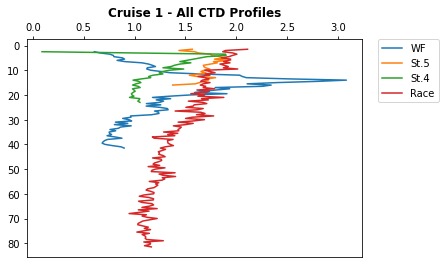

In [51]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True



plt.plot(cWF, dWF, label='WF')
plt.plot(c5, d5, label='St.5')
plt.plot(c4, d4, label='St.4')
plt.plot(crace, drace, label='Race')

plt.gca().invert_yaxis()
plt.title('Cruise 1 - All CTD Profiles', weight='bold')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

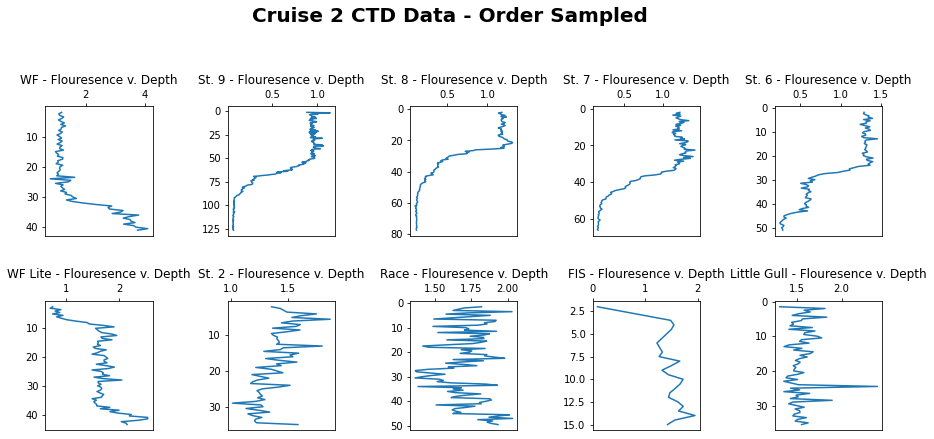

In [52]:
dFIS = []
drace = []
dWF = []
dWFL = []
dSLOPE = []
dLG = []
d2 = []
d6 = []
d7 = []
d8 = []

cFIS = []
crace = []
cWF = []
cWFL = []
cSLOPE = []
cLG = []
c2 = []
c6 = []
c7 = []
c8 = []

stn_FIS = open('FIS_CTD_2.txt','r')
stn_race = open('RACE_CTD_2.txt','r')
stn_WF = open('WF_CTD_2.txt','r')
stn_WFL = open('WFLite_CTD_2.txt', 'r')
stn_SLOPE = open('SLOPE_CTD_2.txt', 'r')
stn_LG = open('LittleGull_CTD_2.txt', 'r')
stn_2 = open('ST2_CTD_2.txt', 'r')
stn_6 = open('ST6_CTD_2.txt', 'r')
stn_7 = open('ST7_CTD_2.txt', 'r')
stn_8 = open('ST8_CTD_2.txt', 'r')



for line in stn_FIS:
	fields = line.split(',')
	dFIS.append(fields[0])
	cFIS.append(fields[8])
    
for line in stn_race:
	fields = line.split(',')
	drace.append(fields[0])
	crace.append(fields[8])
    
for line in stn_WF:
	fields = line.split(',')
	dWF.append(fields[0])
	cWF.append(fields[8])
    
for line in stn_WFL:
	fields = line.split(',')
	dWFL.append(fields[0])
	cWFL.append(fields[8])
 
for line in stn_SLOPE:
	fields = line.split(',')
	dSLOPE.append(fields[0])
	cSLOPE.append(fields[8])
    
for line in stn_LG:
	fields = line.split(',')
	dLG.append(fields[0])
	cLG.append(fields[8])
    
for line in stn_2:
	fields = line.split(',')
	d2.append(fields[0])
	c2.append(fields[8])
    
for line in stn_6:
	fields = line.split(',')
	d6.append(fields[0])
	c6.append(fields[8])
    
for line in stn_7:
	fields = line.split(',')
	d7.append(fields[0])
	c7.append(fields[8])
    
for line in stn_8:
	fields = line.split(',')
	d8.append(fields[0])
	c8.append(fields[8])
       

drace[0]=1.5 #something funky happened to the first value so just a quick replace
dSLOPE[0]=1.5
d8[0]=2


#convert list items to integers
dWF = [float(i) for i in dWF]
cWF = [float(i) for i in cWF]

dWFL = [float(i) for i in dWFL]
cWFL = [float(i) for i in cWFL]

dFIS = [float(i) for i in dFIS]
cFIS = [float(i) for i in cFIS]

drace = [float(i) for i in drace]
crace = [float(i) for i in crace]

dLG = [float(i) for i in dLG]
cLG = [float(i) for i in cLG]

dSLOPE = [float(i) for i in dSLOPE]
cSLOPE = [float(i) for i in cSLOPE]

d2 = [float(i) for i in d2]
c2 = [float(i) for i in c2]

d6 = [float(i) for i in d6]
c6 = [float(i) for i in c6]

d7 = [float(i) for i in d7]
c7 = [float(i) for i in c7]

d8 = [float(i) for i in d8]
c8 = [float(i) for i in c8]

#make plots
fig, axs = plt.subplots(2,5,figsize=(15,6))
plt.subplots_adjust(top=0.75, bottom=0, wspace=0.7, hspace=0.5)
fig.suptitle('Cruise 2 CTD Data - Order Sampled', weight='bold', size='20')


axs[0,0].plot(cWF,dWF)
axs[0,0].set_title('WF - Flouresence v. Depth')
axs[0,0].invert_yaxis()
axs[0,0].xaxis.tick_top()

axs[0,1].plot(cSLOPE,dSLOPE)
axs[0,1].set_title('St. 9 - Flouresence v. Depth')
axs[0,1].invert_yaxis()
axs[0,1].xaxis.tick_top()

axs[0,2].plot(c8,d8)
axs[0,2].set_title('St. 8 - Flouresence v. Depth')
axs[0,2].invert_yaxis()
axs[0,2].xaxis.tick_top()

axs[0,3].plot(c7,d7)
axs[0,3].set_title('St. 7 - Flouresence v. Depth')
axs[0,3].invert_yaxis()
axs[0,3].xaxis.tick_top()

axs[0,4].plot(c6,d6)
axs[0,4].set_title('St. 6 - Flouresence v. Depth')
axs[0,4].invert_yaxis()
axs[0,4].xaxis.tick_top()

axs[1,0].plot(cWFL,dWFL)
axs[1,0].set_title('WF Lite - Flouresence v. Depth')
axs[1,0].invert_yaxis()
axs[1,0].xaxis.tick_top()

axs[1,1].plot(c2,d2)
axs[1,1].set_title('St. 2 - Flouresence v. Depth')
axs[1,1].invert_yaxis()
axs[1,1].xaxis.tick_top()

axs[1,2].plot(crace,drace)
axs[1,2].set_title('Race - Flouresence v. Depth')
axs[1,2].invert_yaxis()
axs[1,2].xaxis.tick_top()

axs[1,3].plot(cFIS,dFIS)
axs[1,3].set_title('FIS - Flouresence v. Depth')
axs[1,3].invert_yaxis()
axs[1,3].xaxis.tick_top()

axs[1,4].plot(cLG,dLG)
axs[1,4].set_title('Little Gull - Flouresence v. Depth')
axs[1,4].invert_yaxis()
axs[1,4].xaxis.tick_top()


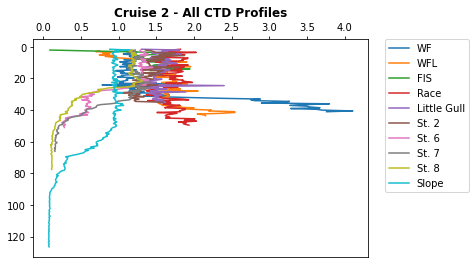

In [53]:
#yeet, now let's see if can put all these together in one plot so they're not so small
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True



plt.plot(cWF, dWF, label='WF')
plt.plot(cWFL, dWFL, label='WFL')
plt.plot(cFIS, dFIS, label='FIS')
plt.plot(crace, drace, label='Race')
plt.plot(cLG, dLG, label='Little Gull')
plt.plot(c2, d2, label='St. 2')

plt.plot(c6, d6, label='St. 6')
plt.plot(c7, d7, label='St. 7')
plt.plot(c8, d8, label='St. 8')
plt.plot(cSLOPE, dSLOPE, label='Slope')

plt.gca().invert_yaxis()
plt.title('Cruise 2 - All CTD Profiles', weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

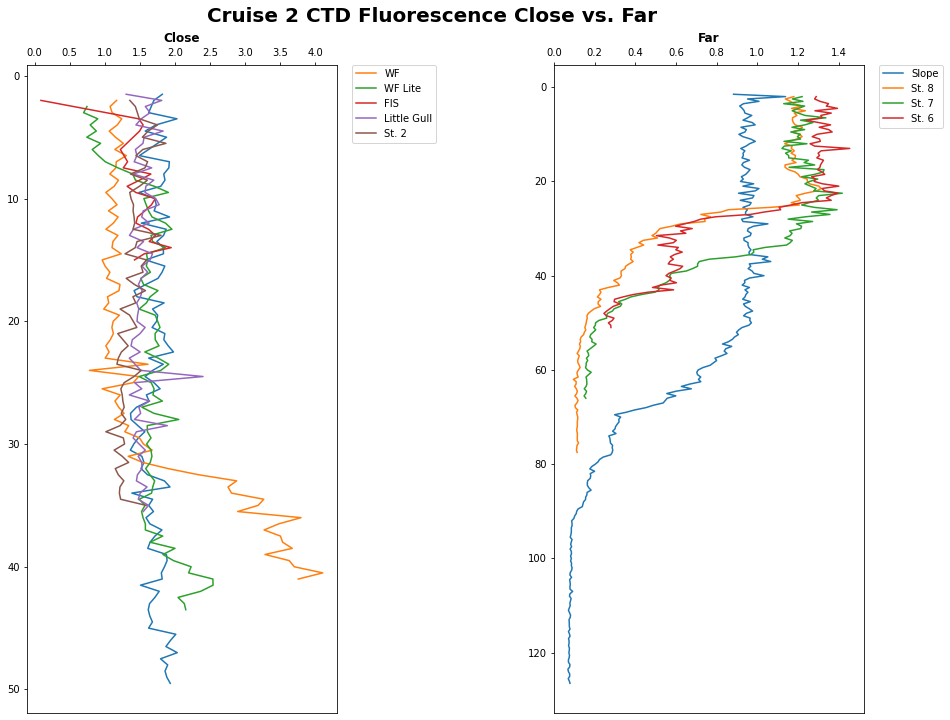

In [54]:
#let's make some of near vs. far shore plots
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,10))
fig.suptitle('Cruise 2 CTD Fluorescence Close vs. Far', weight='bold', size='20')

ax1.plot(crace,drace)
ax1.plot(cWF, dWF, label='WF')
ax1.plot(cWFL, dWFL, label='WF Lite')
ax1.plot(cFIS, dFIS, label='FIS')
ax1.plot(cLG, dLG, label='Little Gull')
ax1.plot(c2, d2, label='St. 2')
ax1.set_title('Close', weight='bold')
ax1.invert_yaxis()
ax1.xaxis.tick_top()
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax2.plot(cSLOPE, dSLOPE, label='Slope')
ax2.plot(c8, d8, label='St. 8')
ax2.plot(c7, d7, label='St. 7')
ax2.plot(c6, d6, label='St. 6')
ax2.set_title('Far', weight='bold')
ax2.invert_yaxis()
ax2.xaxis.tick_top()
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplots_adjust(top=0.90, bottom=0, wspace=0.7)